In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import pickle

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

from sklearn import set_config; set_config(display='diagram')

from detect_ai_content.params import *

from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextLogisticRegression import TrueNetTextLogisticRegression
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextTfidfNaiveBayesClassifier import TrueNetTextTfidfNaiveBayesClassifier
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextDecisionTreeClassifier import TrueNetTextDecisionTreeClassifier
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextSVC import TrueNetTextSVC
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextRNN import TrueNetTextRNN
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextKNeighborsClassifier import TrueNetTextKNeighborsClassifier
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextUsingBERTMaskedPredictions import TrueNetTextUsingBERTMaskedPredictions
from detect_ai_content.ml_logic.for_texts.lgbm_internal import LgbmInternal

from detect_ai_content.ml_logic.data import get_enriched_df
from detect_ai_content.ml_logic.evaluation import evaluate_model

from detect_ai_content.utils import timer


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


torch.cuda.is_available:False


/Users/jeromemorissard/.pyenv/versions/3.10.6/envs/detect_ai_content/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise

device:mps
tf.config.experimental.list_physical_devices(GPU):[]


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = get_enriched_df(purpose="test")
df = df.sample(50)
y_test = df['generated']
df = df[['text']]

TrueNetTextTfidfNaiveBayesClassifier_model = TrueNetTextTfidfNaiveBayesClassifier().local_trained_pipeline()
TrueNetTextLogisticRegression_model = TrueNetTextLogisticRegression().local_trained_pipeline()
TrueNetTextDecisionTreeClassifier_model = TrueNetTextDecisionTreeClassifier().local_trained_pipeline()
TrueNetTextKNeighborsClassifier_model = TrueNetTextKNeighborsClassifier().local_trained_pipeline()
TrueNetTextSVC_model = TrueNetTextSVC().local_trained_pipeline()
TrueNetTextUsingBERTMaskedPredictions_model = TrueNetTextUsingBERTMaskedPredictions().local_trained_pipeline()
LgbmInternal_model = LgbmInternal().pretrained_model()
TrueNetTextRNN_model = TrueNetTextRNN().local_trained_pipeline()

df.head(3)

,text
303,"Doesn't the same goes for humans? In fact, we ..."
24,Having good grades is what makes your GPA grea...
12,Like for example If my school have adopted a f...


In [3]:
from codetiming import Timer
import logging

# Make one full prediction !
text_df = df.sample(1)
print(text_df)

t = Timer("example", text="Time spent: {:.2f}", logger=logging.warning)
t.start()
TrueNetTextLogisticRegression_preds = TrueNetTextLogisticRegression_model.predict(text_df)
TrueNetTextLogisticRegression_duration = t.stop()
print(f"TrueNetTextLogisticRegression_duration: {TrueNetTextLogisticRegression_duration}")

t.start()
TrueNetTextDecisionTreeClassifier_preds = TrueNetTextDecisionTreeClassifier_model.predict(text_df)
TrueNetTextDecisionTreeClassifier_duration = t.stop()
print(f"TrueNetTextDecisionTreeClassifier_duration: {TrueNetTextDecisionTreeClassifier_duration}")

t.start()
TrueNetTextKNeighborsClassifier_preds = TrueNetTextKNeighborsClassifier_model.predict(text_df)
TrueNetTextKNeighborsClassifier_duration = t.stop()
print(f"TrueNetTextKNeighborsClassifier_duration: {TrueNetTextKNeighborsClassifier_duration}")

t.start()
TrueNetTextSVC_preds = TrueNetTextSVC_model.predict(text_df)
TrueNetTextSVC_duration = t.stop()
print(f"TrueNetTextSVC_duration: {TrueNetTextSVC_duration}")

t.start()
TrueNetTextTfidfNaiveBayesClassifier_preds = TrueNetTextTfidfNaiveBayesClassifier_model.predict(text_df)
TrueNetTextTfidfNaiveBayesClassifier_duration = t.stop()
print(f"TrueNetTextTfidfNaiveBayesClassifier_duration: {TrueNetTextTfidfNaiveBayesClassifier_duration}")

t.start()
TrueNetTextUsingBERTMaskedPredictions_preds = TrueNetTextUsingBERTMaskedPredictions_model.predict(text_df)
TrueNetTextUsingBERTMaskedPredictions_duration = t.stop()
print(f"TrueNetTextUsingBERTMaskedPredictions_duration: {TrueNetTextUsingBERTMaskedPredictions_duration}")

t.start()
LgbmInternal_preds = LgbmInternal_model.predict(text_df)
LgbmInternal_duration = t.stop()
print(f"LgbmInternal_duration: {LgbmInternal_duration}")


                                                  text
199  By ceasing to strive for perfection and instea...
TrueNetTextLogisticRegression_duration: 0.05405275000521215
TrueNetTextDecisionTreeClassifier_duration: 0.018102125002769753
TrueNetTextKNeighborsClassifier_duration: 0.018999833999259863
TrueNetTextSVC_duration: 0.017958500000531785
TrueNetTextTfidfNaiveBayesClassifier_duration: 0.0008337920007761568
enrich_text_BERT_predictions


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


1
TrueNetTextUsingBERTMaskedPredictions_duration: 3.58667612499994
process
text_based_features
lexical_diversity_readability
pos_tagging_features
sentiment_emotion_features
['By ceasing to strive for perfection and instead accepting one’s flaws and traits, we open ourselves up to those around us in the hopes of fostering more genuine connections. In contrast, a rigid code of standards and adherence to traditional ideas of beauty can alienate us and limit our potential.\n\nIt is essential to take responsibility for our individual identities and never lose sight of our own values. Being ourselves in a society that is constantly trying to push us to fit into certain standards and expectations is no easy feat. On the other hand, refusing to conform to certain societal norms can lead to isolation and judgment.\n\nRegardless of the potential risks, embracing one’s true self can be one of the strongest steps we take towards building meaningful relationships and renegotiating our own identity.

LgbmInternal_duration: 0.790868625001167


In [15]:
from codetiming import Timer
import logging

# evaluate models (score - time to predict)
objs = []

def evaluate_model_and_save(model_name: str, model: None, df: None, y_test: None, model_size: None):
    t = Timer("example", text="Time spent: {:.2f}", logger=logging.warning)
    full_lenght = 0
    for (index, row) in df.iterrows():
        full_lenght = full_lenght + len(row['text'])

    t.start()
    metrics = evaluate_model(model=model, X_test_processed=df, y_test=y_test)
    duration = t.stop()
    obj = {
        'model_name': model_name,
        'accuracy_score' : metrics['accuracy_score'],
        'f1_score' : metrics['f1_score'],
        'precision_score' : metrics['precision_score'],
        'recall_score' : metrics['recall_score'],
        'predictions_time': duration,
        'number_of_predictions': df.shape[0],
        'fulltext lenght': full_lenght,
        'model_size':model_size
    }
    return obj

objs.append(evaluate_model_and_save(model_name='TrueNetTextRNN',
                                    model=TrueNetTextRNN_model,
                                    df=df,
                                    y_test=y_test,
                                    model_size=TrueNetTextRNN().st_size()
                                    ))

objs.append(evaluate_model_and_save(model_name='TrueNetTextUsingBERTMaskedPredictions',
                                    model=TrueNetTextUsingBERTMaskedPredictions_model,
                                    df=df,
                                    y_test=y_test,
                                    model_size=TrueNetTextUsingBERTMaskedPredictions().st_size()
                                    ))

objs.append(evaluate_model_and_save(model_name='TrueNetTextLogisticRegression',
                                    model=TrueNetTextLogisticRegression_model,
                                    df=df,
                                    y_test=y_test,
                                    model_size=TrueNetTextLogisticRegression().st_size()
                                    ))

objs.append(evaluate_model_and_save(model_name='TrueNetTextDecisionTreeClassifier',
                                    model=TrueNetTextDecisionTreeClassifier_model,
                                    df=df,
                                    y_test=y_test,
                                    model_size=TrueNetTextDecisionTreeClassifier().st_size()
                                    ))

objs.append(evaluate_model_and_save(model_name='TrueNetTextKNeighborsClassifier',
                                    model=TrueNetTextKNeighborsClassifier_model,
                                    df=df,
                                    y_test=y_test,
                                    model_size=TrueNetTextKNeighborsClassifier().st_size()
                                    ))

objs.append(evaluate_model_and_save(model_name='TrueNetTextSVC',
                                    model=TrueNetTextSVC_model,
                                    df=df,
                                    y_test=y_test,
                                    model_size=TrueNetTextSVC().st_size()
                                    ))

objs.append(evaluate_model_and_save(model_name='TrueNetTextTfidfNaiveBayesClassifier',
                                    model=TrueNetTextTfidfNaiveBayesClassifier_model,
                                    df=df,
                                    y_test=y_test,
                                    model_size=TrueNetTextTfidfNaiveBayesClassifier().st_size()
                                    ))

objs.append(evaluate_model_and_save(model_name='LightGBMClassifier (LgbmInternal)',
                                    model=LgbmInternal_model,
                                    df=df,
                                    y_test=y_test,
                                    model_size=LgbmInternal().st_size()
                                    ))

metrics_df = pd.DataFrame(data=objs)
print(metrics_df)
metrics_df.to_csv('estimators_benchmark_50_predictions.csv')

evaluate_model:Pipeline(steps=[('row_cleaner',
                 FunctionTransformer(func=<function smartCleanerFunction at 0x1771581f0>)),
                ('enricher',
                 FunctionTransformer(func=<function smartEnrichFunction at 0x16e235f30>)),
                ('features_selection',
                 FunctionTransformer(func=<function smartSelectionFunction at 0x177158310>,
                                     kw_args={'columns': ['repetitions_ratio',
                                                          'punctuations_ratio',
                                                          'text_corrections_ratio',
                                                          'average_sentence_lenght',
                                                          'average_neg_sentiment_polarity',
                                                          'lexical_diversity',
                                                          'smog_index',
                                       

evaluate_model FIX predictions (continuous to Classes)
y_test: 303    0.0
24     0.0
12     0.0
283    0.0
214    1.0
70     0.0
89     1.0
172    1.0
44     0.0
308    0.0
262    0.0
127    0.0
6      1.0
274    1.0
244    1.0
53     0.0
151    1.0
289    1.0
328    0.0
338    1.0
200    1.0
210    1.0
224    0.0
111    0.0
334    0.0
31     1.0
302    1.0
45     0.0
266    1.0
295    1.0
0      0.0
321    1.0
306    1.0
298    0.0
39     1.0
184    1.0
336    0.0
264    1.0
188    0.0
120    1.0
145    0.0
318    1.0
230    0.0
252    1.0
294    0.0
56     0.0
278    1.0
4      0.0
115    0.0
310    0.0
Name: generated, dtype: float64
y_pred: [[7.60835316e-03]
 [2.47234921e-03]
 [3.55935618e-02]
 [6.41799450e-01]
 [9.95386600e-01]
 [5.86706046e-05]
 [9.99650478e-01]
 [9.93189037e-01]
 [6.03088085e-03]
 [4.57626022e-02]
 [1.32355869e-01]
 [2.10222304e-02]
 [9.54298377e-01]
 [9.99220908e-01]
 [1.57573039e-03]
 [1.24513105e-01]
 [9.94275987e-01]
 [9.99971092e-01]
 [1.70158654e-01]
 [9.9

50
evaluate_model:Pipeline(steps=[('row_cleaner',
                 FunctionTransformer(func=<function smartCleanerFunction at 0x1771581f0>)),
                ('enricher',
                 FunctionTransformer(func=<function smartEnrichFunction at 0x16e235f30>)),
                ('features_selection',
                 FunctionTransformer(func=<function smartSelectionFunction at 0x177158310>,
                                     kw_args={'columns': ['repetitions_ratio',
                                                          'punctuations_ratio',
                                                          'text_corrections_ratio',
                                                          'average_sentence_lenght',
                                                          'average_neg_sentiment_polarity',
                                                          'lexical_diversity',
                                                          'smog_index',
                                    

evaluate_model:Pipeline(steps=[('row_cleaner',
                 FunctionTransformer(func=<function smartCleanerFunction at 0x1771581f0>)),
                ('enricher',
                 FunctionTransformer(func=<function smartEnrichFunction at 0x16e235f30>)),
                ('features_selection',
                 FunctionTransformer(func=<function smartSelectionFunction at 0x177158310>,
                                     kw_args={'columns': ['repetitions_ratio',
                                                          'punctuations_ratio',
                                                          'text_corrections_ratio',
                                                          'average_sentence_lenght',
                                                          'average_neg_sentiment_polarity',
                                                          'lexical_diversity',
                                                          'smog_index',
                                       

evaluate_model:Pipeline(steps=[('row_cleaner',
                 FunctionTransformer(func=<function smartCleanerFunction at 0x1771581f0>)),
                ('enricher',
                 FunctionTransformer(func=<function smartEnrichFunction at 0x16e235f30>)),
                ('features_selection',
                 FunctionTransformer(func=<function smartSelectionFunction at 0x177158310>,
                                     kw_args={'columns': ['repetitions_ratio',
                                                          'punctuations_ratio',
                                                          'text_corrections_ratio',
                                                          'average_sentence_lenght',
                                                          'average_neg_sentiment_polarity',
                                                          'lexical_diversity',
                                                          'smog_index',
                                       

evaluate_model:Pipeline(steps=[('row_cleaner',
                 FunctionTransformer(func=<function smartCleanerFunction at 0x1771581f0>)),
                ('enricher',
                 FunctionTransformer(func=<function smartEnrichFunction at 0x16e235f30>)),
                ('features_selection',
                 FunctionTransformer(func=<function smartSelectionFunction at 0x177158310>,
                                     kw_args={'columns': ['repetitions_ratio',
                                                          'punctuations_ratio',
                                                          'text_corrections_ratio',
                                                          'average_sentence_lenght',
                                                          'average_neg_sentiment_polarity',
                                                          'lexical_diversity',
                                                          'smog_index',
                                       

evaluate_model:Pipeline(steps=[('features_selection',
                 FunctionTransformer(func=<function smartSelectionFunction at 0x177158310>,
                                     kw_args={'columns': ['text']})),
                ('dataframeToSerieTransformer',
                 FunctionTransformer(func=<function dataframeToSerie at 0x177158430>)),
                ('TfidfVectorizer', TfidfVectorizer(min_df=0.1)),
                ('MultinomialNB', MultinomialNB())])
evaluate_model:Pipeline(steps=[('enricher',
                 FunctionTransformer(func=<function LgbmGenerateInternalFeaturesFunction at 0x29882b880>)),
                ('estimator', LGBMClassifier(num_leaves=50, random_state=42))])
process
text_based_features
lexical_diversity_readability
pos_tagging_features


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


sentiment_emotion_features
["Doesn't the same goes for humans? In fact, we need more break because we have a lot to do with friends and family. Even machines don't work perfectly after being used continuously for a long time. Is a year too costly to spend for the life long experience and knowledge? Of course not. This four year of high school is the golden time for everyone as it gives the life long memories and a never ending satisfaction to each and every student who has attended high school.. Just listened that people started taking classes in summer for graduating in three years, Where are the breaks? Don't they need any break. If you can't have a class that you enjoy because of three year graduation then, interest and wishes are worth giving an extra year and you also get so much with it. What is the purpose of going to three year graduation if you don't get time to spend with your closest ones? One year is not a long time if you are in a productive environment and surrounded by p

spelling_error_features
repetition_features
structural_formatting_features
count_slang
concat_features
(50, 22)
                              model_name  accuracy_score  f1_score  \
0                         TrueNetTextRNN            0.86  0.857143   
1  TrueNetTextUsingBERTMaskedPredictions            0.78  0.784314   
2          TrueNetTextLogisticRegression            0.86  0.862745   
3      TrueNetTextDecisionTreeClassifier            0.88  0.880000   
4        TrueNetTextKNeighborsClassifier            0.92  0.916667   
5                         TrueNetTextSVC            0.90  0.901961   
6   TrueNetTextTfidfNaiveBayesClassifier            0.88  0.880000   
7      LightGBMClassifier (LgbmInternal)            0.94  0.938776   

   precision_score  recall_score  predictions_time  number_of_predictions  \
0         0.840000      0.875000          0.975066                     50   
1         0.740741      0.833333        172.696304                     50   
2         0.814815      0.

In [17]:
metrics_df

,model_name,accuracy_score,f1_score,precision_score,recall_score,predictions_time,number_of_predictions,fulltext lenght,model_size
0,TrueNetTextRNN,0.86,0.857143,0.840000,0.875000,0.975066,50,103010,44773
1,TrueNetTextUsingBERTMaskedPredictions,0.78,0.784314,0.740741,0.833333,172.696304,50,103010,2227
2,TrueNetTextLogisticRegression,0.86,0.862745,0.814815,0.916667,0.912609,50,103010,2606
3,TrueNetTextDecisionTreeClassifier,0.88,0.880000,0.846154,0.916667,0.912761,50,103010,8240
4,TrueNetTextKNeighborsClassifier,0.92,0.916667,0.916667,0.916667,0.917139,50,103010,111528
5,TrueNetTextSVC,0.90,0.901961,0.851852,0.958333,0.901547,50,103010,24105
6,TrueNetTextTfidfNaiveBayesClassifier,0.88,0.880000,0.846154,0.916667,0.012923,50,103010,16100
7,LightGBMClassifier (LgbmInternal),0.94,0.938776,0.920000,0.958333,6.621026,50,103010,543730


<Axes: xlabel='predictions_time', ylabel='model_size'>

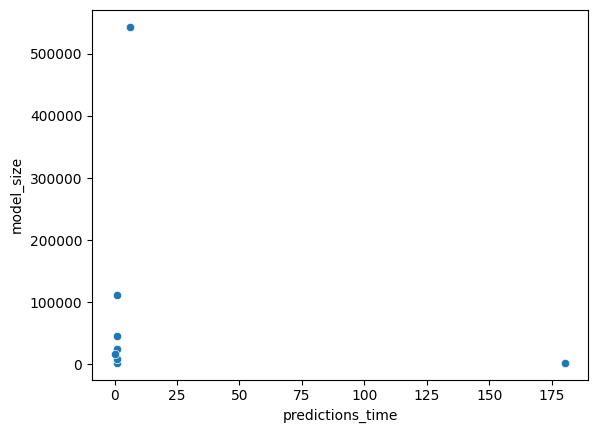

In [9]:
sns.scatterplot(data=metrics_df, x="predictions_time", y='model_size')